In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import os

In [2]:
model = load_model("/kaggle/input/gender_class/keras/default/1/gender_classification.h5")

I0000 00:00:1751368118.661823      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751368118.662544      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [3]:
val_path = r"/kaggle/input/gender-classifier-set/Comys_Hackathon5/Task_A/val"
IMAGE_SIZE = [224, 224]

In [4]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
val_set = val_datagen.flow_from_directory(val_path,
                                          target_size=IMAGE_SIZE,
                                          batch_size=32,
                                          class_mode='categorical',
                                          shuffle=False)

Found 422 images belonging to 2 classes.


In [6]:
y_true = val_set.classes
class_labels = list(val_set.class_indices.keys()) 


In [7]:
Y_pred = model.predict(val_set, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1751368147.459790      96 service.cc:148] XLA service 0x781c5c002290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751368147.461451      96 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751368147.461487      96 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751368148.114102      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/14 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

I0000 00:00:1751368153.014184      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 758ms/step


In [27]:
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


 Classification Report:
              precision    recall  f1-score   support

      female       0.44      0.65      0.52        79
        male       0.91      0.81      0.86       343

    accuracy                           0.78       422
   macro avg       0.67      0.73      0.69       422
weighted avg       0.82      0.78      0.79       422



In [9]:
print("\n Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


 Confusion Matrix:
[[ 51  28]
 [ 65 278]]


In [29]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"\n Accuracy:  {accuracy:.4f}")
print(f"\n Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f" F1 Score:  {f1:.4f}")


 Accuracy:  0.7796

 Precision: 0.8207
Recall:    0.7796
 F1 Score:  0.7942


In [13]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [20]:
datagen = ImageDataGenerator(rescale=1./255)
temp_gen = datagen.flow_from_directory(val_path, target_size=(224, 224))
class_labels = list(temp_gen.class_indices.keys())

Found 422 images belonging to 2 classes.


In [23]:
img_paths = [
    "/kaggle/input/gender-classifier-set/Comys_Hackathon5/Task_A/val/female/Alanis_Morissette_0001.jpg", 
    "/kaggle/input/gender-classifier-set/Comys_Hackathon5/Task_A/val/male/037_frontal.jpg"     
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


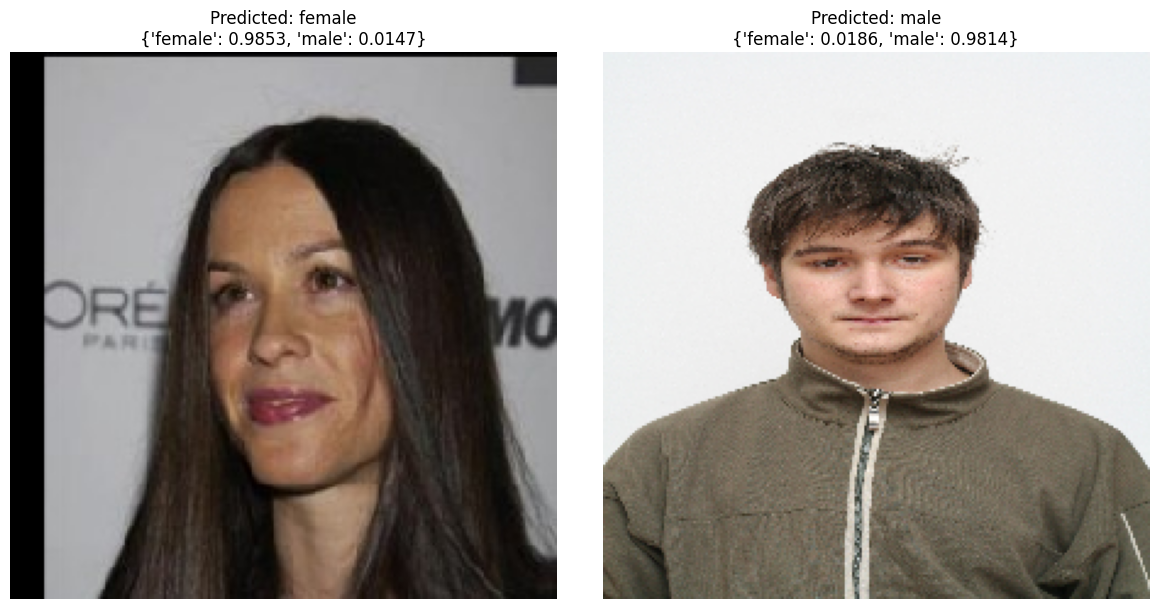

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, img_path in enumerate(img_paths):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    pred_class = np.argmax(pred, axis=1)[0]
    pred_label = class_labels[pred_class]
    probs = dict(zip(class_labels, pred[0].round(4)))

    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Predicted: {pred_label}\n{probs}")

plt.tight_layout()
plt.show()